In [2]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 194kB 5.6MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 849kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 12.7MB/s 
     |████████████████████████████████| 5.5MB 21.0MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 1.0MB 38.9MB/s 
     |████████████████████████████████| 645kB 39.2MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 358kB 36.6MB/s 
     |████████████████████████████████| 174kB 39.4MB/s 
     |████████████████████████████████| 706kB 39.2MB/s 
     |████████████████████████████████| 37.6MB 84kB/s 
     |████████████████████████████████| 194kB 39.4MB/s 
ERROR: tensorflowjs 3.2.0 has requirement tensorflow-hub<0.10,>=0.7.0, but you'll have tensorflow-hub 0.11.0 which is incompatible.


In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [4]:
image_path = "/content/drive/My Drive/CalTech101/CalTech101/training"
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 4436, num_label: 102, labels: BACKGROUND_Google, Faces, Faces_easy, Leopards, Motorbikes, accordion, airplanes, anchor, ant, barrel, bass, beaver, binocular, bonsai, brain, brontosaurus, buddha, butterfly, camera, cannon, car_side, ceiling_fan, cellphone, chair, chandelier, cougar_body, cougar_face, crab, crayfish, crocodile, crocodile_head, cup, dalmatian, dollar_bill, dolphin, dragonfly, electric_guitar, elephant, emu, euphonium, ewer, ferry, flamingo, flamingo_head, garfield, gerenuk, gramophone, grand_piano, hawksbill, headphone, hedgehog, helicopter, ibis, inline_skate, joshua_tree, kangaroo, ketch, lamp, laptop, llama, lobster, lotus, mandolin, mayfly, menorah, metronome, minaret, nautilus, octopus, okapi, pagoda, panda, pigeon, pizza, platypus, pyramid, revolver, rhino, rooster, saxophone, schooner, scissors, scorpion, sea_horse, snoopy, soccer_ball, stapler, starfish, stegosaurus, stop_sign, strawberry, sunflower, tick, trilobite, umbrella,

In [5]:
train_data, rest_data = data.split(0.7)
validation_data, test_data = rest_data.split(0.5) # Since the uneven validation data count we found a decrease in validation accuracy when training with given validation data, so we choose 80% training data, 10% test and validation data from the same dataset.

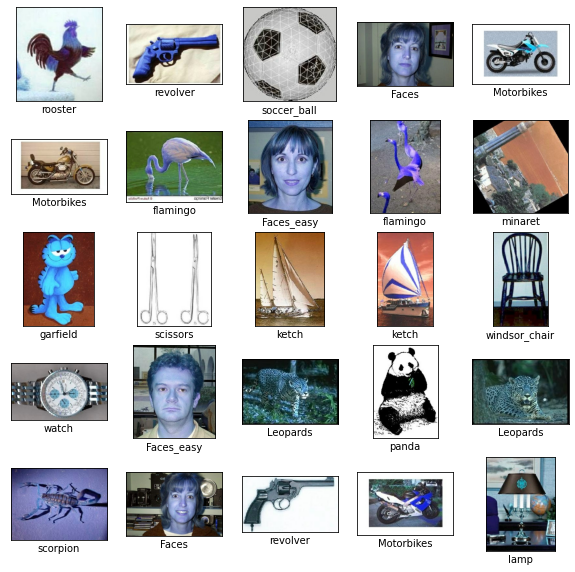

In [6]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [10]:
model = image_classifier.create(train_data,model_spec=model_spec.resnet_50_spec,validation_data=validation_data,epochs=15) # For ResNet50, you can try mobilenet_v2_spec,efficientnet_lite0_spec, efficientnet_lite1_spec,efficientnet_lite2_spec,efficientnet_lite3_spec,efficientnet_lite4_spe 

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 2048)              23564800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 102)               208998    
Total params: 23,773,798
Trainable params: 208,998
Non-trainable params: 23,564,800
_________________________________________________________________
None
Epoch 1/15
97/97 [==============================] - 28s 246ms/step - loss: 2.9202 - accuracy: 0.5165 - val_loss: 1.2103 - val_accuracy: 0.9219
Epoch 2/15
97/97 [==============================] - 23s 241ms/step - loss: 1.1608 - accuracy: 0.9450 - val_loss: 1.1388 - val_accuracy: 0.9297
Epoch 3/15
97/97 [==============================] - 23s 242ms/step - loss: 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 2048)              23564800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 102)               208998    
Total params: 23,773,798
Trainable params: 208,998
Non-trainable params: 23,564,800
_________________________________________________________________


In [13]:
loss, accuracy = model.evaluate(test_data)

21/21 [==============================] - 9s 140ms/step - loss: 1.0672 - accuracy: 0.9444


In [12]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

KeyboardInterrupt: ignored

<Figure size 1440x1440 with 0 Axes>

In [10]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpfbn6495k/assets


INFO:tensorflow:Assets written to: /tmp/tmpfbn6495k/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp5ulz7jcs/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp5ulz7jcs/labels.txt.


In [11]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.4117647  0.41960785 0.47843137]
   [0.42352942 0.43137255 0.49019608]
   [0.41775212 0.42559525 0.48441878]
   ...
   [0.25985646 0.3029937  0.37358195]
   [0.26474097 0.30787823 0.37846646]
   [0.27554262 0.30980393 0.38335082]]

  [[0.44509804 0.45294118 0.51176476]
   [0.45589986 0.463743   0.52256656]
   [0.4445159  0.45235905 0.5111826 ]
   ...
   [0.26627934 0.31235775 0.38147542]
   [0.26519608 0.31127453 0.38039216]
   [0.26519608 0.31127453 0.38039216]]

  [[0.4490196  0.45686275 0.5156863 ]
   [0.45688027 0.4647234  0.52354693]
   [0.44718137 0.4550245  0.51384807]
   ...
   [0.25913432 0.31661415 0.38111433]
   [0.25975135 0.31522238 0.38039216]
   [0.26130074 0.3144477  0.38039216]]

  ...

  [[0.05931373 0.07205883 0.09803922]
   [0.12301733 0.13576242 0.16174282]
   [0.10623688 0.11898197 0.14135155]
   ...
   [0.25912538 0.29147834 0.30226263]
   [0.16319405 0.19554701 0.20633133]
   [0.12543294 0.15778588 0.16857019]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.4117647  0.41960785 0.47843137]
   [0.42352942 0.43137255 0.49019608]
   [0.41775212 0.42559525 0.48441878]
   ...
   [0.25985646 0.3029937  0.37358195]
   [0.26474097 0.30787823 0.37846646]
   [0.27554262 0.30980393 0.38335082]]

  [[0.44509804 0.45294118 0.51176476]
   [0.45589986 0.463743   0.52256656]
   [0.4445159  0.45235905 0.5111826 ]
   ...
   [0.26627934 0.31235775 0.38147542]
   [0.26519608 0.31127453 0.38039216]
   [0.26519608 0.31127453 0.38039216]]

  [[0.4490196  0.45686275 0.5156863 ]
   [0.45688027 0.4647234  0.52354693]
   [0.44718137 0.4550245  0.51384807]
   ...
   [0.25913432 0.31661415 0.38111433]
   [0.25975135 0.31522238 0.38039216]
   [0.26130074 0.3144477  0.38039216]]

  ...

  [[0.05931373 0.07205883 0.09803922]
   [0.12301733 0.13576242 0.16174282]
   [0.10623688 0.11898197 0.14135155]
   ...
   [0.25912538 0.29147834 0.30226263]
   [0.16319405 0.19554701 0.20633133]
   [0.12543294 0.15778588 0.16857019]]

  [[0.

{'accuracy': 0.9346846846846847}